In [22]:
# Import Librariesfrom keras.models import Sequential
from keras.layers import Dense
import re
import warnings
from keras.models import load_model
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import time
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras import initializers
import keras

In [23]:
data = pd.read_csv('data.csv')
data=data.drop(['Unnamed: 32'],axis=1)

In [24]:
number=LabelEncoder()
data['diagnosis']=number.fit_transform(data['diagnosis'].astype('str'))
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,842517,1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,84300903,1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,84348301,1,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,84358402,1,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,843786,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,844359,1,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,84458202,1,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,844981,1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,84501001,1,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [25]:
train=data.drop(['id'],axis=1)

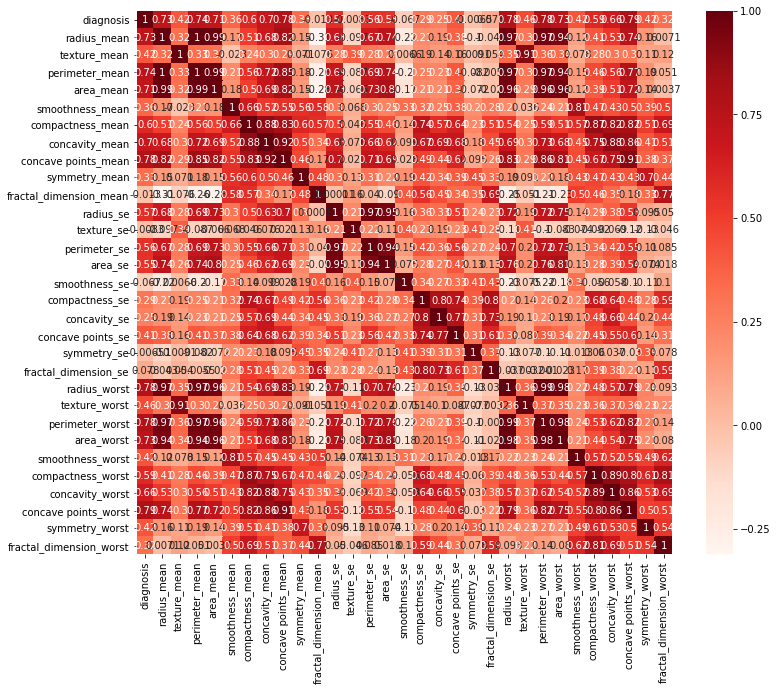

In [26]:
plt.figure(figsize=(12,10))
cor = train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [27]:
cor_target = abs(cor["diagnosis"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.75]
relevant_features

diagnosis               1.000000
concave points_mean     0.776614
radius_worst            0.776454
perimeter_worst         0.782914
concave points_worst    0.793566
Name: diagnosis, dtype: float64

In [35]:
X=data.drop(['diagnosis','compactness_se','concavity_se','perimeter_se','area_se','fractal_dimension_mean','smoothness_mean','area_mean','compactness_mean','concave points_mean','perimeter_mean','area_worst','perimeter_worst','texture_worst','concave points_worst','radius_worst','compactness_worst','concavity_worst','id'],axis=1)
#X=data.drop(['diagnosis','id'],axis=1)

Y=pd.DataFrame(data['diagnosis'])

In [55]:
plt.figure(figsize=(12,10))
cor = pd.concat([X,Y],axis=1).corr()
#sns.heatmap(cor[np.abs(cor)>.8], annot=True, cmap=plt.cm.Reds)
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

TypeError: cannot concatenate object of type "<class 'numpy.ndarray'>"; only pd.Series, pd.DataFrame, and pd.Panel (deprecated) objs are valid

<Figure size 864x720 with 0 Axes>

In [ ]:
X.shape

In [42]:
scaler = MinMaxScaler()
Y=data['diagnosis']
X = scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [43]:
gnb = GaussianNB()
gnb.fit(X_train,Y_train)
Y_pred_dt = gnb.predict(X_test)
acc_decision_tree = round(gnb.score(X_test, Y_test) * 100, 2)
print("Gaussian",acc_decision_tree)
print(confusion_matrix(Y_test,Y_pred_dt))
print(classification_report(Y_test,Y_pred_dt))

Gaussian 91.23
[[63  4]
 [ 6 41]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93        67
           1       0.91      0.87      0.89        47

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



In [44]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred_dt = lr.predict(X_test)
acc_decision_tree = round(lr.score(X_test, Y_test) * 100, 2)
print("Logistic",acc_decision_tree)
print(confusion_matrix(Y_test,Y_pred_dt))
print(classification_report(Y_test,Y_pred_dt))

Logistic 94.74
[[67  0]
 [ 6 41]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        67
           1       1.00      0.87      0.93        47

    accuracy                           0.95       114
   macro avg       0.96      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [45]:
Y.shape

(569,)

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
acc_logistic=[]
a=[]
for i in range(10):
    acc_logistic.append([])
for i in range(10):
    lr=KFold(n_splits=5,random_state=1,shuffle=True)
    lr.get_n_splits(X)
    for train_index, test_index in lr.split(X):
    #    print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        lr = LogisticRegression()
        lr.fit(X_train,Y_train)
        Y_pred_dt = lr.predict(X_test)
        acc_logistic[i].append(round(lr.score(X_test, Y_test) * 100, 2))
        a.append(round(lr.score(X_test, Y_test) * 100, 2))
s1=np.mean(acc_logistic)
s1

94.37799999999999

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
acc_gaussian=[]
b=[]
for i in range(10):
    acc_gaussian.append([])
for i in range(10):
    gnb=KFold(n_splits=5,random_state=1,shuffle=True)
    gnb.get_n_splits(X)
    for train_index, test_index in gnb.split(X):
    #    print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        gnb = GaussianNB()
        gnb.fit(X_train,Y_train)
        Y_pred_dt = gnb.predict(X_test)
        acc_gaussian[i].append(round(gnb.score(X_test, Y_test) * 100, 2))
        b.append(round(gnb.score(X_test, Y_test) * 100, 2))
s2=np.mean(acc_gaussian)
s2

91.57000000000002

In [48]:
Y.shape

(569,)

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
acc_decision_tree=[]
c=[]
for i in range(10):
    acc_decision_tree.append([])
for i in range(10):
    dlf=KFold(n_splits=5,random_state=1,shuffle=True)
    dlf.get_n_splits(X)
    for train_index, test_index in dlf.split(X):
    #    print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        dlf = DecisionTreeClassifier()
        dlf.fit(X_train,Y_train)
        Y_pred_dt = lr.predict(X_test)
        acc_decision_tree[i].append(round(dlf.score(X_test, Y_test) * 100, 2))
        c.append(round(dlf.score(X_test, Y_test) * 100, 2))
s3=np.mean(acc_decision_tree)
s3

91.2132

In [17]:
s2

91.57000000000002

In [18]:
len(a)

50

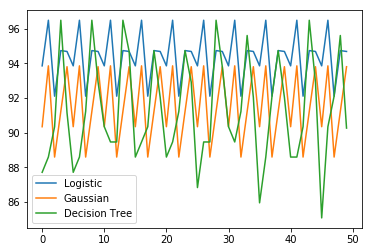

In [19]:
plt.plot(a,label='Logistic')
plt.legend()
plt.plot(b,label='Gaussian')
plt.legend()
plt.plot(c,label='Decision Tree')
plt.legend()
plt.show()